In [8]:
"""
Author: JiaHui (Jeffrey) Lu
ID: 25944800
"""

import numpy as np
import matplotlib.pyplot as plt

In [9]:
"""
Question1: define Rung Kutta 2 method.
This method takes in the derivative function f, the b value, the step size h and the 
initial position (x_0, y_0).
Returns the one step approximation from x_0 to x_0 + h using Runge Kutta
"""


def rungeKutta2(f, b, h, x_0, y_0):
    a = 1 - b
    alpha = 0.5 / b
    beta = 0.5 / b
    k1 = f(x_0, y_0)
    k2 = f(x_0 + alpha * h, y_0 + k1 * beta * h)
    return y_0 + (a * k1 + b * k2) * h

In [10]:
"""
Question2: define the euler method.
This method takes in the derivative function f, the step size h, and the initial
position (x_0, y_0). 
Returns the one step euler approximation from x_0 to x_0 + h
"""


def euler(f, h, x_0, y_0):
    return y_0 + h * f(x_0, y_0)

In [11]:
"""
Question 3, defining the functions
"""


def func1(x, y):
    return x * np.sqrt(1 - (y-4) ** 2)

def func1_original(x):
    return np.sin((x**2)/2)+4

def func2(x, y):
    return y ** 3

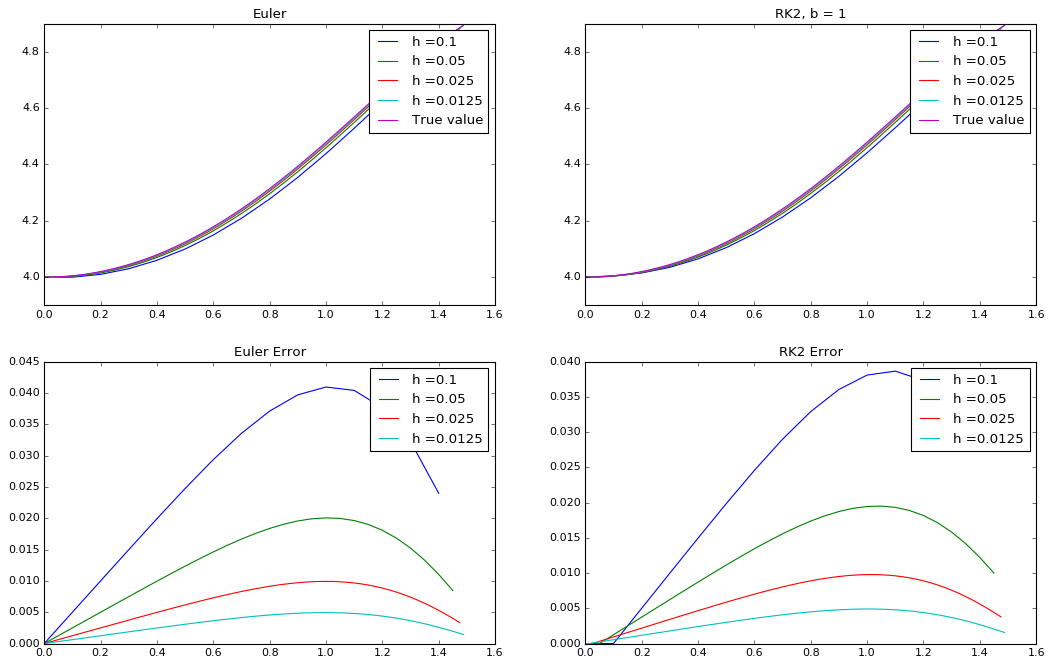

In [24]:
"""
question 4: plotting the solutions

function1:
"""

h_vals = [0.1, 0.05, 0.025, 0.0125]
fig=plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')
for k in range(len(h_vals)):
    x_vals = np.arange(0, 1.5, h_vals[k])
    y_vals = [4]
    y_vals_RK = [4]
    y_vals_real = func1_original(x_vals)
    
    for i in range(len(x_vals)-1):
        y_vals.append(euler(func1, h_vals[k], x_vals[i], y_vals[i]))
        y_vals_RK.append(rungeKutta2(func1, 0.5, h_vals[k], x_vals[i], y_vals[i]))
    
    plt.subplot(2,2,1)
    plt.plot(x_vals, np.array(y_vals), label="h ="+str(h_vals[k]))
    
    plt.subplot(2,2,2)
    plt.plot(x_vals, np.array(y_vals_RK), label="h ="+str(h_vals[k]))
    
    plt.subplot(2,2,3)
    plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals)), label="h ="+str(h_vals[k]))
    
    plt.subplot(2,2,4)
    plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals_RK)), label="h ="+str(h_vals[k]))
    
    
plt.subplot(2,2,1)
plt.plot(x_vals, y_vals_real, label="True value")
plt.title('Euler')
plt.legend()

plt.subplot(2,2,2)
plt.plot(x_vals, y_vals_real, label="True value")
plt.title('RK2, b = 1')
plt.legend()

plt.subplot(2,2,3)
plt.legend()
plt.title("Euler Error")

plt.subplot(2,2,4)
plt.legend()
plt.title("RK2 Error")

plt.show()

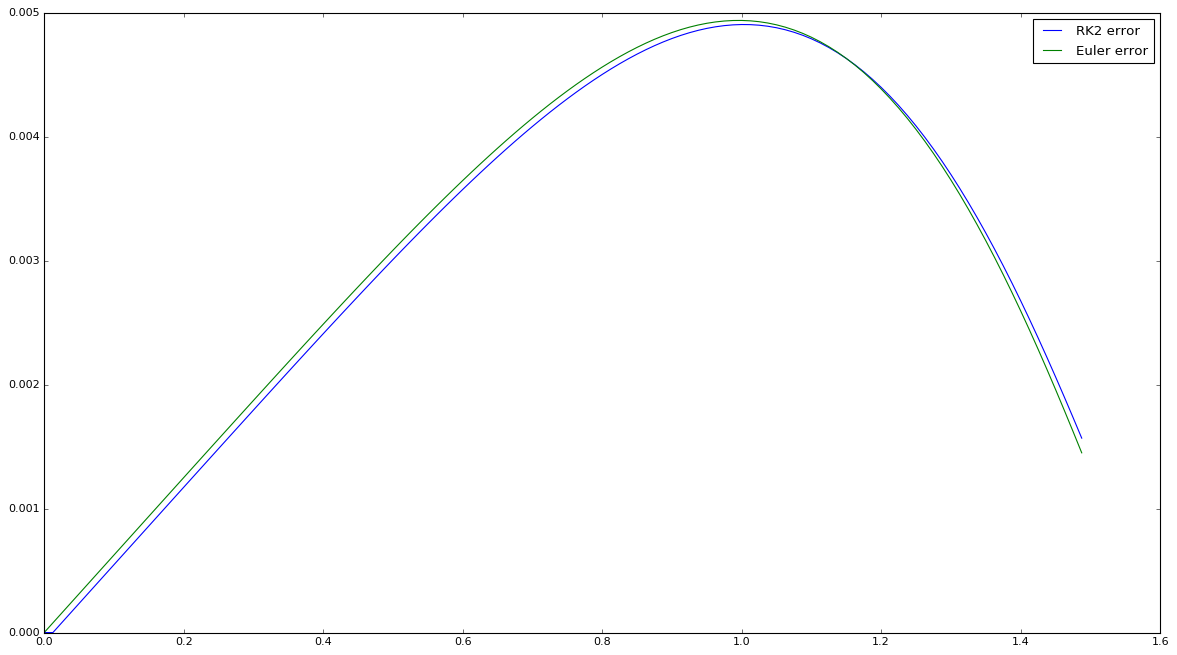

In [26]:
"""
Side by side error comparision when h = 0.0125
RK2 appears to be slightly better than Euler, however the Euler gets to be better after some point after 1.1. This 
appears to be an anomaly. 

RK2 is better due to its predictor/corrector property where each step is computed using two gradients whereas Euler only
uses one gradient. Hence less accurate to the true value. 
"""
fig=plt.figure(figsize=(18, 10), dpi=80, facecolor='w', edgecolor='k')
plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals_RK)), label="RK2 error")
plt.plot(x_vals, np.abs(np.array(y_vals_real) - np.array(y_vals)), label="Euler error")
plt.legend()
plt.show()

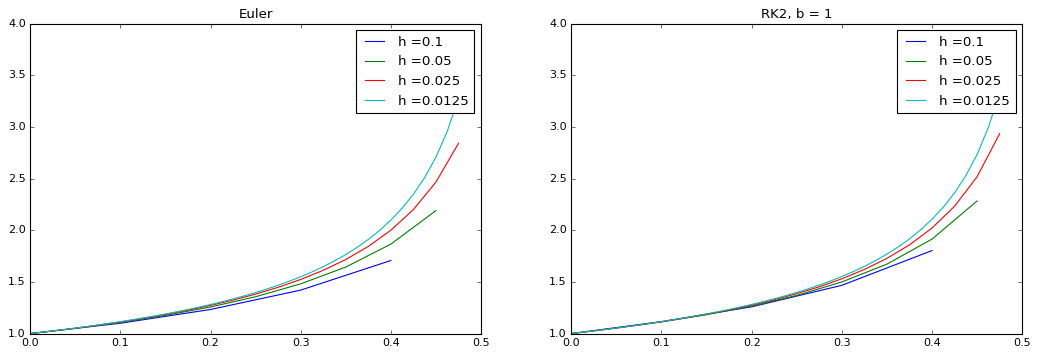

In [18]:
"""
second function

It is apparent in this function that RK2 out performs Euler's method. This is expected, as RK2 uses two gradients
to generate a predictor and then a corrector to the previous gradient. Consequently resulting in a more accurate 
graph compare to what Euler method is able to generate. However, a better accuracy comes at a cost of more computation
as more gradients are required to be computed.
"""


h_vals = [0.1, 0.05, 0.025, 0.0125]
fig=plt.figure(figsize=(16, 5), dpi= 80, facecolor='w', edgecolor='k')
for k in range(len(h_vals)):
    x_vals = np.arange(0, 0.5, h_vals[k])
    y_vals = [1]
    y_vals_RK = [1]
    
    for i in range(len(x_vals)-1):
        y_vals.append(euler(func2, h_vals[k], x_vals[i], y_vals[i]))
        y_vals_RK.append(rungeKutta2(func2, 1, h_vals[k], x_vals[i], y_vals[i]))
    
    plt.subplot(1,2,1)
    plt.plot(x_vals, np.array(y_vals), label="h ="+str(h_vals[k]))
    
    plt.subplot(1,2,2)
    plt.plot(x_vals, np.array(y_vals_RK), label="h ="+str(h_vals[k]))
    
    
    
plt.subplot(1,2,1)
plt.title('Euler')
plt.legend()

plt.subplot(1,2,2)
plt.title('RK2, b = 1')
plt.legend()

plt.show()